# Apriori Algorithm

## Introduction:

This algorithm was proposed by Agrawal and Srikant in 1994. It was designed to operate on databases containing transactions (for e.g, collections of items bought by customers, or details of a website frequentation or IP addresses (Wikipedia)

1. It follows bottom-up approach and Association Rule Mining (ARM)

2. It takes larger dataset and do scoring or contrasts it with other sets in some manners

3. It can be effectively used in addition to other supporting algorithm

4. It finds patterns that occur together and are related to one another

5. It is used for mining frequent item sets and relevant association rules

6. It is devised to operate on databases containing a lot of transactions like item brought by customers in a store.


## Theory behind Apriori

### Apriori contains two steps:

1. Join
2. Prune (sort of cleaning)

### Main terminologies:

1. Support: Number of transactions having the item by the total number of transactions

2. Confidence: Measure of trustworthiness

3. Lift: Measure of mutual probabilty


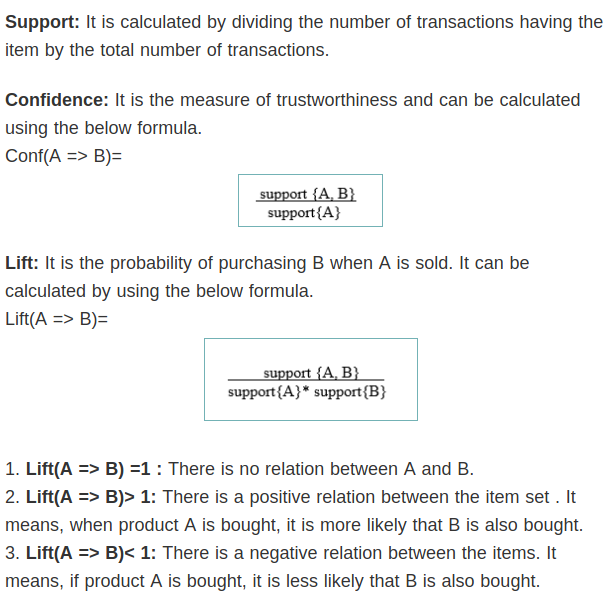

(Image Source : https://www.codespeedy.com/apriori-algorithm-in-python/)



In [7]:
#!pip install apyori

!pip install mlxtend

     |████████████████████████████████| 1.3 MB 136 kB/s eta 0:00:01


In [45]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations

In [46]:
# Loading the dataset
df = pd.read_csv('aprioriDataset.csv')

df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [47]:
# getting the columns of the data

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [48]:
# getting the different regions of transactions
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [49]:
# Cleaning the Data

#Stripping extra spaces in the description

df['Description'] = df['Description'].str.strip()

#dropping the rows without any invoice number

df.dropna(axis = 0, subset = ['InvoiceNo'], inplace = True)
df = df[~df['InvoiceNo'].str.contains('C')]

## Splitting the data according to the region of transaction

In [50]:
basket_France = ((df[df['Country'] == 'France']).groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

# Transactions done in the United Kingdom 
basket_UK = (df[df['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in Portugal 
basket_Por = (df[df['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
basket_Sweden = (df[df['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

## Hot Encoding the data

In [51]:
def hot_encode(x):
    if(x<=0):
        return 0
    if(x>=1):
        return 1
    
# encoding the datasets

basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded 
  
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded 
  
basket_encoded = basket_Por.applymap(hot_encode) 
basket_Por = basket_encoded 
  
basket_encoded = basket_Sweden.applymap(hot_encode) 
basket_Sweden = basket_encoded

## Building and analyzing th results

### 1. UK

In [59]:


frq_items = apriori(basket_UK, min_support = 0.04, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules) 


                 antecedents                consequents  antecedent support  \
1  (JUMBO BAG PINK POLKADOT)  (JUMBO BAG RED RETROSPOT)            0.062085   
0  (JUMBO BAG RED RETROSPOT)  (JUMBO BAG PINK POLKADOT)            0.103814   

   consequent support   support  confidence      lift  leverage  conviction  
1            0.103814  0.042051    0.677308  6.524245  0.035605    2.777218  
0            0.062085  0.042051    0.405057  6.524245  0.035605    1.576478  


## Similarly, other cases can also be studied!